<a href="https://colab.research.google.com/github/nshamid/Rock-Paper-Scissors-Classification/blob/main/Rock_Paper_Scissors_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import requests
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
dataset_url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
response = requests.get(dataset_url)
with open('rockpaperscissors.zip', 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile('rockpaperscissors.zip', 'r') as zip_ref:
    zip_ref.extractall()

base_dir = 'rockpaperscissors/rps-cv-images'

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.01)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[early_stopping]
)

accuracy = history.history['val_accuracy'][-1]
print(f"Akurasi validasi: {accuracy * 100:.2f}%")

Epoch 1/20
42/42 - 17s - 417ms/step - accuracy: 0.3752 - loss: 1.1665 - val_accuracy: 0.3490 - val_loss: 1.0641
Epoch 2/20
42/42 - 12s - 281ms/step - accuracy: 0.5221 - loss: 0.9609 - val_accuracy: 0.7952 - val_loss: 0.5742
Epoch 3/20
42/42 - 12s - 283ms/step - accuracy: 0.7116 - loss: 0.6899 - val_accuracy: 0.9142 - val_loss: 0.3342
Epoch 4/20
42/42 - 12s - 282ms/step - accuracy: 0.7839 - loss: 0.5407 - val_accuracy: 0.9405 - val_loss: 0.2767
Epoch 5/20
42/42 - 20s - 476ms/step - accuracy: 0.8014 - loss: 0.4870 - val_accuracy: 0.9119 - val_loss: 0.2653
Epoch 6/20
42/42 - 21s - 497ms/step - accuracy: 0.8272 - loss: 0.4433 - val_accuracy: 0.9359 - val_loss: 0.2491
Epoch 7/20
42/42 - 12s - 281ms/step - accuracy: 0.8196 - loss: 0.4456 - val_accuracy: 0.9279 - val_loss: 0.2391
Epoch 8/20
42/42 - 12s - 282ms/step - accuracy: 0.8501 - loss: 0.4031 - val_accuracy: 0.9245 - val_loss: 0.2364
Epoch 9/20
42/42 - 12s - 280ms/step - accuracy: 0.8486 - loss: 0.3920 - val_accuracy: 0.9565 - val_loss:

Saving tangan.jpg to tangan.jpg


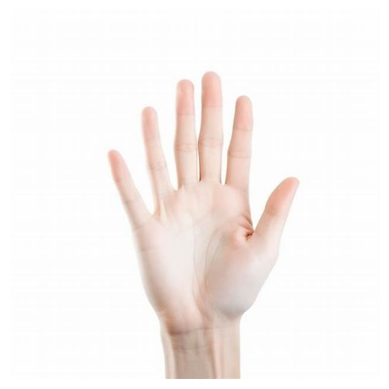

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
Prediksi: paper


In [14]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_resized = cv2.resize(img_array, (150, 150))

    img_resized = img_resized / 255.0
    img_batch = np.expand_dims(img_resized, axis=0)


    classes = model.predict(img_batch)
    class_idx = np.argmax(classes)

    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[class_idx]

    print(f"Prediksi: {predicted_label}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


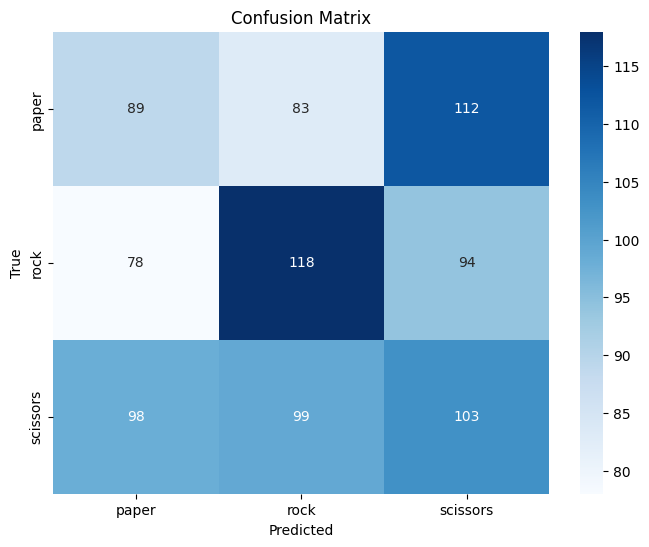

              precision    recall  f1-score   support

       paper       0.34      0.31      0.32       284
        rock       0.39      0.41      0.40       290
    scissors       0.33      0.34      0.34       300

    accuracy                           0.35       874
   macro avg       0.35      0.35      0.35       874
weighted avg       0.35      0.35      0.35       874



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the validation data
validation_generator.reset()  # Reset generator
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
cm_labels = list(train_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(validation_generator.classes, y_pred, target_names=cm_labels))


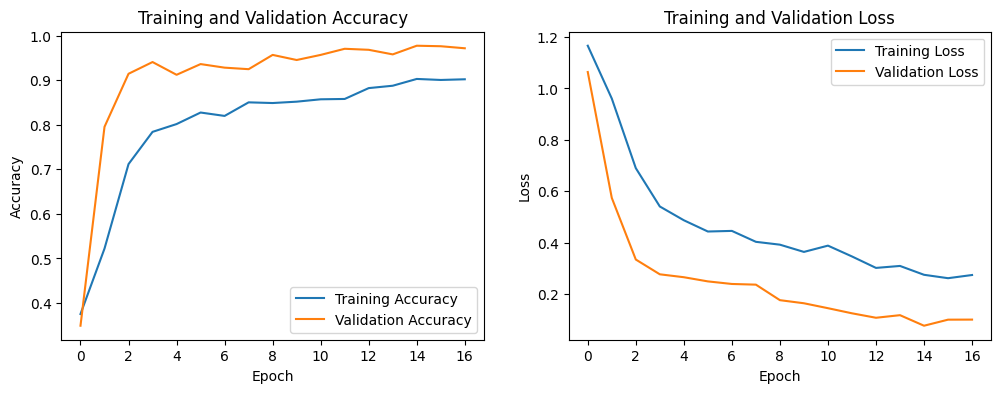

In [16]:
# Plot Akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()